In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
#load the dataset
claimants = pd.read_csv("/content/claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants.shape

(1340, 7)

In [ ]:
#dropping the case num col as its not required
claimants.drop(["CASENUM"],inplace=True,axis=1)#inplace means within same datasetchanges n axis means v r dealing with columns

In [ ]:
claimants.shape

(1340, 6)

In [ ]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [ ]:
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
#lets divide data into x n y variable
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
#Dividing our data into input and output varaibles
X= claimants.iloc[:,1:]#independent varaible ser = clmsex to loss
Y= claimants.iloc[:,0]#dependent varaible ser = ATTORNEY

In [ ]:
#LOGISTIC regression and fit the model
classifier = LogisticRegression() # classifier is just an object name for class logoistic regression
classifier.fit(X,Y)# v r passing indepen n depen var into fit

LogisticRegression()

In [ ]:
#predict for x dataset
y_pred= classifier.predict(X)

In [ ]:
y_pred # y hat values for x

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df=pd.DataFrame({'actual':Y,
                        'predicted_prob':y_pred})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# v r creating confusion matrix here to check accuracy of y n y hat
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)
#                  actual values--->   1                   0
#predicted values   381 197         1  True .positive     False.positive
#                   123 395         0  False.Negative     True.Negative
#on DIAGONAL ITS TRUE
#TO FIND OUT ACCURACY  --- Sum of correctly predicted values(i.e diag val) /  tot no of preddictions


[[381 197]
 [123 395]]


In [ ]:
((381+395)/(381+197+123+395))*100#accuracy

70.8029197080292

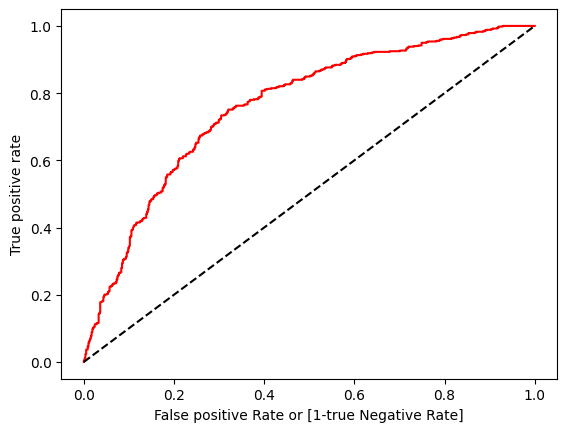

In [ ]:
#Roc curve
from sklearn.metrics import roc_curve#reciever operting charecteristics
from sklearn.metrics import roc_auc_score#auc-area under curve
fpr,tpr, thresholds=roc_curve(Y, classifier.predict_proba (X)[:,1])# we want to predict pr

#here we willget false positive rate , \TP N threshold val
auc = roc_auc_score(Y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0,1],[0,1],'k--')#x axis range is 0 to 1 , k-- is a dotted line
plt.xlabel('False positive Rate or [1-true Negative Rate]')
plt.ylabel('True positive rate')
plt.show() # red one is roc curve

In [ ]:
auc

0.7108589063606365